# Chapter 4: POS tagging

In [ ]:
import json

##  Read the POS tagging results

In [ ]:
def read_pos_tagging(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        sentence = []
        for line in file:
            line = line.strip()
            if line:
                columns = line.split('\t')
                if len(columns) >= 4:  # Ensure the line has at least 4 columns
                    word_info = {
                        'text': columns[1],
                        'lemma': columns[2],
                        'pos': columns[3]
                    }
                    sentence.append(word_info)
            else:
                if sentence:  # End of a sentence
                    sentences.append(sentence)
                    sentence = []
        if sentence:  # Append the last sentence if the file doesn't end with a newline
            sentences.append(sentence)
    return sentences

# loading file
conll_file_path = '/content/alice.txt.conll'
pos_tagging_result = read_pos_tagging(conll_file_path)

# Print the first sentence to verify the result
if pos_tagging_result:
    print(pos_tagging_result[0])

else:
    print("No data.")



[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'}, {'text': "'S", 'lemma': "'s", 'pos': 'POS'}, {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'}, {'text': 'IN', 'lemma': 'in', 'pos': 'IN'}, {'text': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'}]


In [ ]:
print(type(pos_tagging_result))

<class 'list'>


## 31. Verbs
Extract surface forms of all verbs appearing in the text.

In [ ]:
def  extract_verbs(sentences):
  verbs = [] # verb list
  for sentence in sentences:
    #print(sentence[0])
    for word_info in sentence:
      print(word_info)
      if word_info['pos'].startswith('VB') :# POS tag starts with 'VB' for verbs
        verbs.append(word_info['text'])
  return verbs



verbs = extract_verbs(pos_tagging_result)
print(verbs) # lis contatining all the extrated verb from the list of pos

Streaming output truncated to the last 5000 lines.
{'text': ',', 'lemma': ',', 'pos': ','}
{'text': 'by', 'lemma': 'by', 'pos': 'IN'}
{'text': 'the', 'lemma': 'the', 'pos': 'DT'}
{'text': 'way', 'lemma': 'way', 'pos': 'NN'}
{'text': ',', 'lemma': ',', 'pos': ','}
{'text': 'was', 'lemma': 'be', 'pos': 'VBD'}
{'text': 'the', 'lemma': 'the', 'pos': 'DT'}
{'text': 'King', 'lemma': 'King', 'pos': 'NNP'}
{'text': ';', 'lemma': ';', 'pos': ':'}
{'text': 'and', 'lemma': 'and', 'pos': 'CC'}
{'text': 'as', 'lemma': 'as', 'pos': 'IN'}
{'text': 'he', 'lemma': 'he', 'pos': 'PRP'}
{'text': 'wore', 'lemma': 'wear', 'pos': 'VBD'}
{'text': 'his', 'lemma': 'he', 'pos': 'PRP$'}
{'text': 'crown', 'lemma': 'crown', 'pos': 'NN'}
{'text': 'over', 'lemma': 'over', 'pos': 'IN'}
{'text': 'the', 'lemma': 'the', 'pos': 'DT'}
{'text': 'wig', 'lemma': 'wig', 'pos': 'NN'}
{'text': ',', 'lemma': ',', 'pos': ','}
{'text': '-LRB-', 'lemma': '-lrb-', 'pos': '-LRB-'}
{'text': 'look', 'lemma': 'look', 'pos': 'VB'}
{'text'

## 32. Base forms of verbs
Extract lemmas of all verbs appearing in the text.

In [ ]:
def extract_verb_lemmas(sentences):
  verb_lemmas = []
  for sentence in sentences:
    for word_info in sentence:
      if word_info['pos'].startswith('VB'):  # POS tag starts with 'VB' for verbs
        verb_lemmas.append(word_info['lemma']) # apppend all verb lemmas to verb_lemmas list
  return verb_lemmas



verb_lemmas = extract_verb_lemmas(pos_tagging_result) # function calll
print(verb_lemmas)

['be', 'begin', 'get', 'sit', 'have', 'do', 'have', 'peep', 'be', 'read', 'have', 'be', 'think', 'be', 'consider', 'make', 'make', 'be', 'get', 'pick', 'run', 'be', 'do', 'think', 'hear', 'say', 'be', 'think', 'occur', 'have', 'wonder', 'seem', 'take', 'watch', 'look', 'hurry', 'start', 'flash', 'have', 'see', 'take', 'burn', 'run', 'be', 'see', 'pop', 'go', 'consider', 'be', 'get', 'go', 'dip', 'have', 'think', 'stop', 'find', 'fall', 'be', 'fall', 'have', 'go', 'look', 'wonder', 'be', 'go', 'happen', 'try', 'look', 'make', 'be', 'come', 'be', 'see', 'look', 'notice', 'be', 'fill', 'see', 'hang', 'peg', 'take', 'pass', 'be', 'label', 'be', 'do', 'like', 'drop', 'kill', 'manage', 'put', 'fall', 'think', 'think', 'tumble', 'brave', 'think', 'say', 'fall', 'be', 'come', 'wonder', 'have', 'fall', 'say', 'be', 'get', 'let', 'see', 'be', 'think', 'see', 'have', 'learn', 'be', 'show', 'be', 'listen', 'be', 'say', 'be', 'wonder', 'have', 'get', 'have', 'be', 'think', 'be', 'say', 'begin', 'wo

## 33. A of B
Extract noun phrases in the form of “A of B”, where A and B are nouns.

In [ ]:
def extract_noun_pharases(sentences):
  noun_pharases = []
  for sentence in sentences:
    for i in range (len(sentence)-2):
      if (sentence[i]['pos'].startswith('NN') and
        sentence[i+1]['text'].lower() == 'of' and
        sentence[i+2]['pos'].startswith('NN')):
        noun_pharases.append(f"{sentence[i]['text']} of {sentence[i+2]['text']}")
  return noun_pharases
noun_pharases = extract_noun_pharases(pos_tagging_result)
print(noun_pharases[:5])



['OUT of ITS', 'plenty of time', 'saucer of milk', 'sort of way', 'heap of sticks']


## 34. A B
Extract the longest noun phrase consisting of consecutive nouns

In [ ]:
def extract_longest_noun_phrase(pos_tagging_result):
    longest_phrase = ""
    for sentence in pos_tagging_result:
        current_phrase = []
        for word in sentence:
            if word['pos'].startswith('NN'):
                current_phrase.append(word['text'])
            else:
                if len(current_phrase) > len(longest_phrase.split()):
                    longest_phrase = ' '.join(current_phrase)
                current_phrase = []
        if len(current_phrase) > len(longest_phrase.split()):
            longest_phrase = ' '.join(current_phrase)
    return longest_phrase

# Example usage
longest_noun_phrase = extract_longest_noun_phrase(pos_tagging_result)
print(longest_noun_phrase)




Ou est ma chatte


## 35. Frequency of words
Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.

In [ ]:
from collections import Counter
def word_frequencies(pos_tagging_result):
  words = [word['text'] for sentence in pos_tagging_result for word in sentence ]# list comprenhension for fast computation
  #print(words)
  return Counter(words)


# function Call
frequencies = word_frequencies(pos_tagging_result)
print(frequencies.most_common(10))# print the words which has hihest frequency

[(',', 2418), ('the', 1522), ("'", 1130), ('`', 1081), ('.', 986), ('and', 796), ('to', 721), ('a', 614), ('I', 544), ('it', 527)]


## 36. Top-ten frequent words
Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).

(',', 'the', "'", '`', '.', 'and', 'to', 'a', 'I', 'it') (2418, 1522, 1130, 1081, 986, 796, 721, 614, 544, 527)


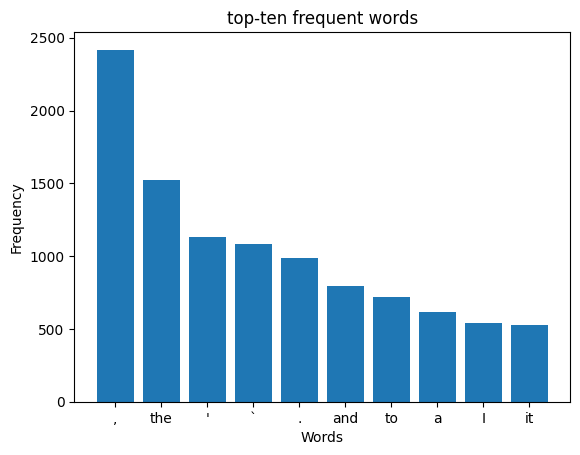

In [ ]:
import matplotlib.pyplot as plt
def plot_frequent_words(frequenceis):
  top_ten = frequencies.most_common(10)
  #print(top_ten)
  words , counts = zip(*top_ten)
  print(words , counts)
  plt.bar(words , counts)
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.title('top-ten frequent words')
  # plt.xticks(rotation = 45)
  plt.show()

plot_frequent_words(frequencies) # bar plot to visualize visually in figure and it is 2 d representation and created based on words frequency.

## 37. Top-ten words co-occurring with ‘Alice’
Extract the list of words that co-occur with the word “Alice”. Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies

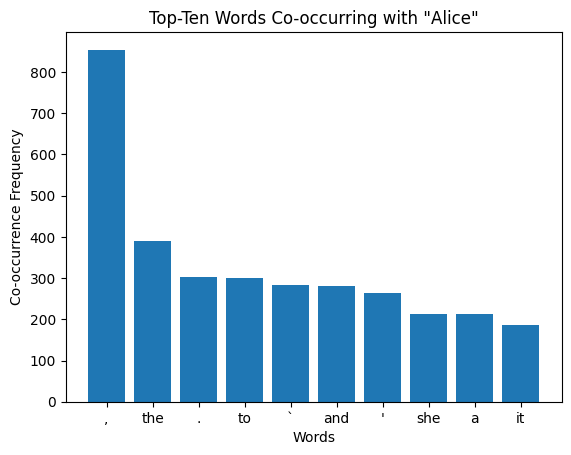

In [ ]:
def words_co_occurring_with_alice(pos_tagging_result):
    co_occurrences = Counter()
    for sentence in pos_tagging_result:
        words = [word['text'] for word in sentence]
        if 'Alice' in words:
            for word in words:
                if word != 'Alice':
                    co_occurrences[word] += 1
    return co_occurrences

def plot_top_ten_co_occurrences(co_occurrences):
    top_ten = co_occurrences.most_common(10)
    words, counts = zip(*top_ten)
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Co-occurrence Frequency')
    plt.title('Top-Ten Words Co-occurring with "Alice"')
    #plt.xticks(rotation=45)
    plt.show()

co_occurrences = words_co_occurring_with_alice(pos_tagging_result)
plot_top_ten_co_occurrences(co_occurrences)


## 38. Histogram
Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, and the y-axis is the count of unique words that fall into the count of the x value).

In [ ]:
 counts = list(frequencies.values())
 print(counts)

[3, 7, 1, 2, 1, 1, 1, 9, 1, 1, 1, 1, 12, 1, 3, 1522, 1, 395, 363, 14, 721, 44, 126, 7, 497, 10, 54, 243, 9, 189, 3, 2418, 796, 10, 30, 119, 233, 31, 76, 5, 509, 184, 3, 67, 7, 3, 133, 527, 69, 4, 2, 354, 1081, 93, 106, 18, 614, 1130, 74, 26, 202, 27, 3, 10, 9, 56, 246, 37, 82, 140, 5, 25, 30, 8, 5, 5, 56, 11, 2, 8, 1, 82, 145, 4, 6, 22, 96, 2, 1, 69, 12, 22, 44, 176, 1, 29, 16, 13, 986, 33, 124, 13, 2, 275, 194, 2, 74, 50, 51, 112, 53, 14, 51, 14, 35, 28, 450, 544, 23, 6, 40, 2, 2, 14, 81, 1, 202, 113, 65, 173, 27, 53, 4, 1, 1, 17, 1, 1, 3, 1, 1, 45, 72, 11, 2, 19, 1, 5, 41, 36, 15, 2, 9, 1, 7, 18, 1, 5, 1, 36, 1, 45, 66, 1, 99, 33, 3, 16, 2, 11, 22, 31, 83, 40, 7, 83, 108, 2, 84, 1, 48, 2, 130, 94, 1, 83, 30, 2, 7, 1, 6, 8, 1, 27, 18, 27, 8, 28, 7, 19, 27, 8, 25, 3, 19, 4, 8, 129, 86, 3, 2, 1, 39, 65, 14, 1, 1, 26, 1, 39, 23, 2, 34, 94, 1, 5, 1, 1, 1, 39, 1, 1, 1, 4, 1, 5, 4, 31, 1, 23, 40, 7, 2, 3, 27, 1, 56, 61, 5, 27, 216, 17, 78, 62, 8, 18, 8, 5, 3, 9, 2, 25, 52, 17, 12, 3, 43, 4,

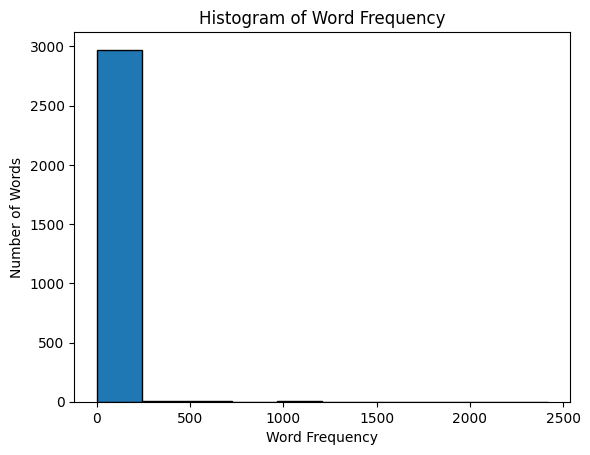

In [ ]:
def plot_word_frequency_histogram(frequencies):
    counts = list(frequencies.values())
    plt.hist(counts,  edgecolor='black')
    plt.xlabel('Word Frequency')
    plt.ylabel('Number of Words')
    plt.title('Histogram of Word Frequency')
    plt.show()

# Example usage
plot_word_frequency_histogram(frequencies)


## 39. Zipf’s law
Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.

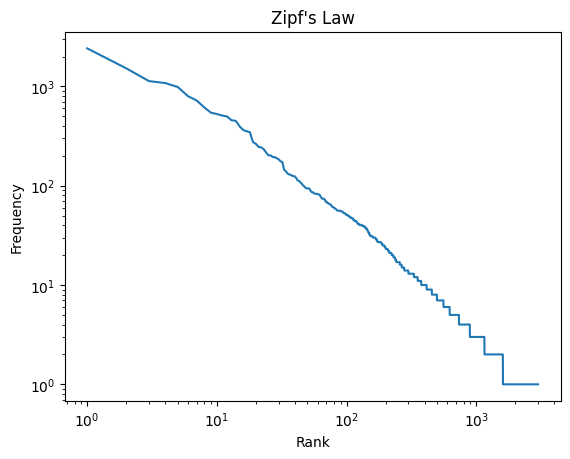

In [ ]:
import numpy as np

def plot_zipfs_law(frequencies):
    rank_freq = frequencies.most_common()
    ranks = np.arange(1, len(rank_freq) + 1)
    freqs = np.array([freq for word, freq in rank_freq])
    plt.loglog(ranks, freqs)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title("Zipf's Law")
    plt.show()

# Example usage
plot_zipfs_law(frequencies)
